# Introduction to Python & Numpy (move to Prac 0.a)
Fork this and build on it: 

https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb

# Machine Learning Fundamentals (move to Prac 0.b)

In this section we will quickly review the fundamentals of Machine Learning. Machine learning can be defined as:

>*the process whereby a **model** improves its performance with respect to some **task**, as measured in terms of some performance measure or **objective function**, by learning from examples from some **data** or training set.*

In order to talk about Machine Learning, we will therefore talk about all of these ideas in turn.

## Data

what do we mean when we talk about the **structure** of datasets?


## Hypothesis functions or "models"
How do they work, the assumptions that models necessarily have to make about the data in order to be useful (no free lunch), and again, what do we mean when we talk about the "structure" of models.

## Parametric vs non-parametric learning

What do parameters do/represent? Decision boundaries, weight vectors, etc.


## Objective/loss functions

Empasize that this is a scalar goodness-of-fit function of the input data, parameterized using the model parameters.

## Learning as Optimization

Optimizing a cost function moves around in parameter/weight space, and each position is quantified by its scalar loss value. 


## Empirical Risk Minimization
Overfitting & the need for training/validation/test splits. What we care about is performance on held-out data.


# Building Intuitions: Our First Classifier on Simple Toy Data

Run the code in the cell below, and look at the resulting plot. It should produce a simple 2D data set consisting of 2 classes of points, a weight vector in black, and a decision boundary in red. The goal is to obtain a decision boundary that best separates the different classes of points.

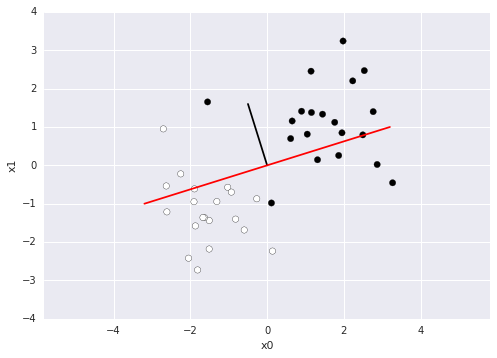

In [2]:
import numpy as np               # Numpy is an efficient linear algebra library.
import matplotlib.pyplot as plt  # Matplotlib is used to generate plots of data.

centre = 1.0
points_in_class = 20
# Setting a random seed allows us to recreate the same data each time we run the cell.
np.random.seed(0)

# Generate data.
x_pos = np.random.normal(loc=centre, scale=1.0, size=[points_in_class, 2])  # Generate random points in the "positive" class
x_neg = np.random.normal(loc=-centre, scale=1.0, size=[points_in_class, 2])  # Generate random points in the "negative" class
x = np.concatenate((x_pos, x_neg), axis=0) 
  
# The class (or "y") value is +1 or -1 for the 2 classes
y_pos = np.ones(points_in_class)  
y_neg = - np.ones(points_in_class)
y = np.concatenate((y_pos, y_neg), axis=0)

# N is the total data set size
N = 2 * points_in_class

# Plot the data using Matplotlib
fig = plt.figure()  
plt.scatter(x[:, 0], x[:, 1], c=y, s=40)
plt.axis('equal')

# Pick a weight vector. In the exercise below, you are going to change the
# values in this weight vector to see how the decision boundary changes.
w = [-0.5, 1.6]  # CHANGE ME!! 

# Add the weight vector to the plot.
plt.plot([0, w[0]], [0, w[1]], 'k-')

# Plot part of the decision boundary in red. It is orthogonal to the weight vector.
t = 2
plt.plot([-t * w[1], t * w[1]], [t * w[0], -t * w[0]], 'r-')

# Add some labels to the plot and display it
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

# What do parameters do?

* Change w = [0.5, 1.6] to different values, and re-run the above code.

* How does the decision boundary change?

* Where in x-space is the inner product w' * x positive? Negative? Zero? Can you relate that to the class labels y?

* By changing w, can you manually find a weight vector that does a good job of discriminating between the two classes?
  * How did you manually find it? What made you move from one choice to the next?

* Now that you've found it manually, chat with your friend next to you.
  * How will you find it automatically?
  * Can you devise a function, where minimizing it does the same thing as the way you manually searched?
  * Pause here and think.
    * Which values of w give "bad solutions", according to you?
    * Which ones give good solutions?

* Try to draw the function that you devised on a piece of paper. It should be small when w gives a "good solution", and it should be big when w gives a "bad solution". Be creative and think of your own function. Show your drawing it to your neighbour.

DO NOT PROCEED ANY FURTHER UNTIL YOU'VE THOROUGHLY ATTEMPTED ALL THE ABOVE QUESTIONS. (Ask your tutors for help if you're stuck!)

# A loss function of w

* Below we will formulate it as a loss function.

* Run the code below, and look at the plot of the loss function. Note that it is not in x-space any more, but that our axis labels are w[0] and w[1]!

* Do the weights w that you found manually correspond to the minimum of the loss function?


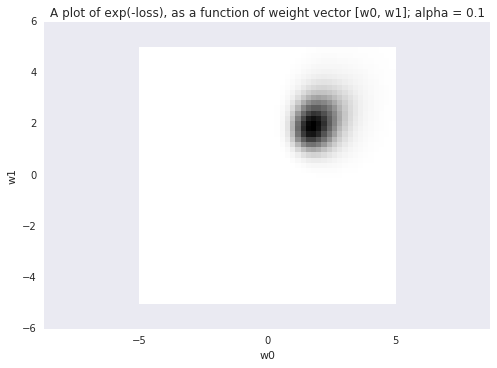

In [5]:
def compute_loss(w0, w1, x, y, alpha):
  # We start with a regularizer.
  # What is its effects on the loss function? Does it change the loss function's
  # minimum?
  loss = alpha * (w0 * w0 + w1 * w1)
  
  # Add the data point's contribution to the loss. We do this for every data
  # point. (We don't have to do it in a for-loop, but below, you can really see
  # what is happening...)
  for n in xrange(N):
    # Get the inner product x' * w for data point x.
    inner = w0 * x[n, 0] + w1 * x[n, 1]
    
    # Now look at the plot with a weight vector in our "data space".
    loss += np.log(1 + np.exp(- y[n] * inner))
  
  return loss
  
lim = 5
ind = np.linspace(-lim, lim, 50)
w0, w1 = np.meshgrid(ind, ind)

# You will change the value of alpha (below), to see how the loss function
# changes. It has to be alpha >= 0. No negative values (otherwise the loss
# function's minimum is at negative infinity)!
alpha = 0.1
loss = compute_loss(w0, w1, x, y, alpha)

fig = plt.figure()
plt.pcolor(w0, w1, np.exp(-loss))
# We plot exp(-1oss) here, to let the colours show clearly in the plot. This is
# incidentally also proportional to the joint distribution
# p(y, w | x) = p(y | x, w) p(w), which you'll encounter on Wednesday in the
# Indaba, and can safely ignore for now.
plt.title('A plot of exp(-loss), as a function of weight vector [w0, w1]; '
          + 'alpha = ' + str(alpha))
plt.xlabel('w0')
plt.ylabel('w1')
plt.axis('equal')
plt.show()

# Trying different loss functions

* As a first exercise, look at the function that computes the loss. There is a for-loop, essentially a sum.
  * Can you write down the loss function on a piece of paper? As a mathematical expression...
  
* On a piece of paper, can you draw
        log(1 + exp(- y[n] * inner))
  as a function of the inner product, the value of y, etc.
  * When is it almost zero, and the contribution to the loss is neglible?
  * Where does it become almost linear?
    
    After you've done your drawings, explain to yourself why the function is equivalent to
        inner = y[n] * (w0 * x[n, 0] + w1 * x[n, 1])   
        l += np.log(1 + np.exp(- inner))
    What is the effect of the class label y on the weight vector. What happens if we multiply a weight vector with -1?

* Now change the setting of alpha. Make it bigger, and smaller. What happens to the minimum?

**TODO(sgouws)**: Cut here and move to Prac 0.b


# Working with More Complex Data

Real-world data is unfortunately not as simple as our toy bimodal Gaussian example above. Real data (e.g. pixels from vision, or speech phonemes, or words of a language) can have very complex, high-dimensional distributions. Before we get our hands dirty with that, we'll move one step up and work with another toy dataset, but this time non-linear.

In [0]:
import numpy as np  # Numpy is an efficient linear algebra library.
import matplotlib.pyplot as plt  # Matplotlib is used to generate plots of data.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# (if you're curious, see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

Let's generate a dataset with three spirals arranged in a swiss-roll type structure, and where each spiral forms a "class" that we want to be able to classify (i.e. the classes are very non-linearly distributed).

## Hyperparameters

First we define some hyperparameters that will be used by the next few cells. Try changing these values to see how the models work with different data. 

In [0]:
num_classes = 3  # The number of classes (distinct groups) of data (these are our "y" values)
dimensions = 2  # The number of dimensions of our input or "X" values
points_per_class = 100  # number of X points to generate for each of the y values

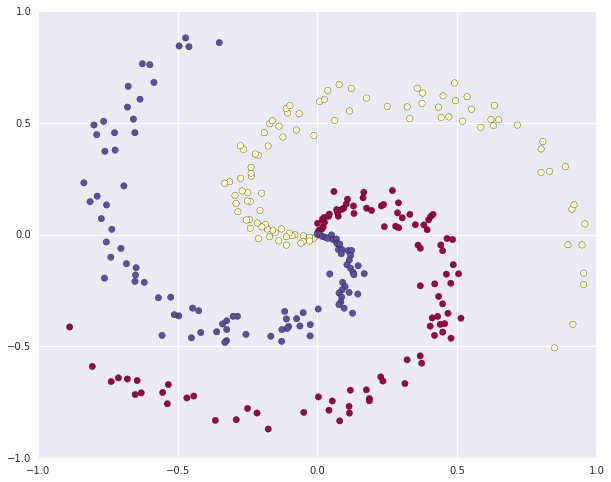

In [4]:
# Setting a random seed allows us to get the exact same data each time we run 
# the cell.
np.random.seed(0)  

def generate_spiral_data(num_classes, dimensions, points_per_class):
  """Generate `num_classes` spirals with `points_per_class` points per spiral."""
  
  X = np.zeros((points_per_class*num_classes, dimensions), dtype='float32')  # Create an empty matrix to hold our X values
  y = np.zeros(points_per_class*num_classes, dtype='uint8')  # Create an empty vector to hold our y values

  for y_value in xrange(num_classes):   # Generate data for each class
    ix = range(points_per_class*y_value, points_per_class*(y_value+1))  # The indices in X and y where we will save this class of data

    radius = np.linspace(0.0, 1, points_per_class)  # Generate evenly spaced numbers in the interval 0 to 1
    theta = np.linspace(y_value*4, (y_value+1)*4, points_per_class) + np.random.randn(points_per_class) * 0.2  

    X[ix] = np.column_stack([radius*np.sin(theta), radius*np.cos(theta)])   # Convert polar coordinates to standard Euclidian coordinates
    y[ix] = y_value
  
  return X, y
  
  
def plot_data(X, y):
  """Use Matplotlib to plot X, y data on a figure."""
  fig = plt.figure()
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
  plt.xlim([-1,1])
  plt.ylim([-1,1])
  return fig

X, y = generate_spiral_data(num_classes, dimensions, points_per_class)
fig = plot_data(X, y)

# fig.savefig('spiral_raw.png')  # Uncomment this line if you want to save your image to a file

# Implementing a Classifier from Scratch
Before experimenting with libraries like TensorFlow, we start by implementing a simple linear classifier and then a more complex nonlinear classifier from scratch in Numpy. This allows us to be able to go through all the low-level details of how to make predictions and how to train our models, as these details are very important. 

Later on, we will then reimplement these two classifiers using TensorFlow, and hopefully we will see that this makes things much easier (especially as the models get more complex!).

## Implementing a Linear Classifier

**TODO**: Add description (math + flow-graph). Break up the code below and discuss each section in more detail.

How do we define and train a model that learns to separate the num_classes different classes, based on their coordinates in X space?

Let's start with a simple linear model and see how far we can get. Note that when we say "linear model" we mean that it is a linear function of the **parameters** that maps inputs to predictions.

### Defining helper functions
Begin by defining some re-usable helper functions. You may want to look ahead to the LinearModel before implementing these to see how they get used. 

In [0]:
def softmax(logits):
  """Convert un-normalised model scores(logits) into a probability distribution.

  Args:
    logits: The un-normalised scores assigned by the model.
  """
  exp_logits = np.exp(logits)
  probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
  return probs

def cross_entropy(predictions, targets):
  """Calculate the cross entropy loss given some predictions and target (true) values.

  Args:
    predictions: The model predictions (of shape [num_examples, num_classes])
    targets: The correct labels for the data (of shape [num_examples])
  """
  num_examples = predictions.shape[0]
  correct_logprobs = -np.log(predictions[range(num_examples), targets])
  crossentropy = np.sum(correct_logprobs) / num_examples
  return crossentropy

def l2_loss(parameters):
  """Calculate the L2 regularisation of a list of parameters."""
  reg = 0.0
  for param in parameters:
    reg += 0.5 * reg_lambda * np.sum(param * param)
  return reg

### Defining the linear model
Now we define the linear model itself. We put this in a class so that we can think of it as a "black box" that takes in our inputs and returns some predictions and a loss value that tells us how good our predictions are. We can also update the model using its update method. Doing it this way gives a clean separation between the model and training of the model and will be a useful pattern to use going forward.

In [0]:
### HYPERPARAMETERS

learning_rate = 1e-0  # How far along the gradient do we want to travel when doing 
                      # gradient descent?
reg_lambda = 1e-3  # Regularization strength

####

# Define the initial random value of W here so we can re-use it later.
W_init = 0.01 * np.random.randn(dimensions, num_classes)

class LinearModel(object):
  def __init__(self):
    # Initialize the model parameters.
    self.W = np.copy(W_init)
    self.b = np.zeros((1, num_classes))
  
  def predictions(self, X):
    """Make predictions of classes (y values) given some inputs (X)."""
    # Evaluate class scores/"logits": [points_per_class*num_classes x num_classes].
    logits = self.get_logits(X)

    # Compute the class probabilities.
    probs = softmax(logits)
    
    return probs
  
  def loss(self, probs, y):
    """Calculate the loss given model predictions and true targets."""
    num_examples = probs.shape[0]
    data_loss = cross_entropy(probs, y)
    regulariser = l2_loss([self.W])
    return data_loss + regulariser
  
  def update(self, probs, X, y):  
    """Update the model parameters using back-propagation and gradient descent."""
    # Calculate the gradient of the loss with respect to logits
    dlogits = self.derivative_loss_logits(probs, y)  
    
    # Gradient of the loss wrt W
    dW = self.derivative_loss_W(X, dlogits)
    
    # Gradient of the loss wrt b
    db = self.derivative_loss_b(dlogits)
    
    # Don't forget the gradient on the regularization term.
    dW += self.derivative_regularisation()
    
    # Perform a parameter update.
    self.W += -learning_rate * dW
    self.b += -learning_rate * db
    
  
  ##### Now we define some helper functions   
  # (This is probably where students will have to add lines of code)
  def get_logits(self, X):
    """Calculate the un-normalised model scores.

    Args:
      X: The input values.
    """
    return np.dot(X, self.W) + self.b 

  def derivative_loss_logits(self, logits, y):
    """Calculate the derivative of the loss with respect to logits."""
    num_examples = y.shape[0]
    dlogits = logits
    dlogits[range(num_examples),y] -= 1
    dlogits /= num_examples
    return dlogits
  
  def derivative_loss_W(self, X, dlogits):
    """Calculate the derivative of the loss wrt W."""
    return np.dot(X.T, dlogits)
  
  def derivative_loss_b(self, dlogits):
    """Calculate the derivative of the loss wrt b."""
    return np.sum(dlogits, axis=0, keepdims=True)
  
  def derivative_regularisation(self):
    return reg_lambda * self.W   

### Training the Linear Model
Now that we've defined our "black box" linear model. We can train it on our dummy spiral dataset

In [0]:
# Define a function that trains a model for a given number of epochs
def train_model(model, epochs, report_every):
  for i in xrange(epochs):
  
    # Get the model predictions for our spiral dataset X
    probs = model.predictions(X)

    # Compute the loss
    loss = model.loss(probs, y)

    # Print the loss value every `report_every` steps.
    if i % report_every == 0:
      print "iteration %d: loss %f" % (i, loss)

    # Use back-propagation to update the model parameters:
    model.update(probs, X, y)  

In [22]:
# Create an instance of our LinearModel
linear_model = LinearModel()

# Now we train the linear model for 200 epochs
train_model(linear_model, 200, 10)

iteration 0: loss 1.100624
iteration 10: loss 0.918448
iteration 20: loss 0.851978
iteration 30: loss 0.822560
iteration 40: loss 0.807703
iteration 50: loss 0.799514
iteration 60: loss 0.794720
iteration 70: loss 0.791788
iteration 80: loss 0.789936
iteration 90: loss 0.788736
iteration 100: loss 0.787944
iteration 110: loss 0.787413
iteration 120: loss 0.787052
iteration 130: loss 0.786805
iteration 140: loss 0.786634
iteration 150: loss 0.786515
iteration 160: loss 0.786432
iteration 170: loss 0.786373
iteration 180: loss 0.786332
iteration 190: loss 0.786302


### Evaluating the model
The training of the model should have converged to a value around 0.786 if you used the default data parameters earlier. (Convergence means that the loss decreases to a point and then stops decreasing). But how do we interpret this? Is our model actually good at making predictions? Let's work out the **accuracy** of the model to see:

In [0]:
# Define a function that calcuates and prints the accuracy of a model's predictions
def evaluate_model(model):
  # Get the probabilites/scores that the model assigns to each class for each X datapoint.
  scores = model.get_logits(X)  # The shape of scores is [num_data_points, num_classes]

  # The index of the maximum score along the 2nd dimension is the class that the model thinks is most likely (y^) for each datapoint.
  predicted_class = np.argmax(scores, axis=1)

  # What proportion of the class predictions made by the model (y^) agree with the true class values (y) ?
  print 'Accuracy: %.2f' % (np.mean(predicted_class == y))  

In [33]:
# Now evaluate the trained linear model
evaluate_model(linear_model)

Accuracy: 0.49


This is not a very good result (we are misclassifying around 50% of the data points, and these are data points that we've seen before!), lets visualise the decision boundary to determine what's going on.

### Visualizing the Linear Model's Decision Boundary

Let's visualize the decision boundary of this linear classifier on the swiss roll dataset.


In [0]:
# Define a function that plots the decision boundary of a model
def plot_decision_boundary(X, model):
  """Overlays the classifier's decision boundary on the dataset [X, y].
  
  Args:
    X: 2-d matrix input data,
    model: The model to evaluate
  """
  
  step_size = 0.02  # Discretization step-size
  
  # Get the boundaries of the dataset.
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # Generate a grid of points, step_size apart, over the above region.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                       np.arange(y_min, y_max, step_size))
  
  # Flatten the data and get the logits of the classifier (the "scores") for 
  #   each point in the generated mesh-grid.
  meshgrid_matrix = np.c_[xx.ravel(), yy.ravel()]
  Z = model.get_logits(meshgrid_matrix)
  
  # Get the class predictions for each point.
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  
  # Overlay both of these on one figure.
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  #fig.savefig('spiral_linear.png')

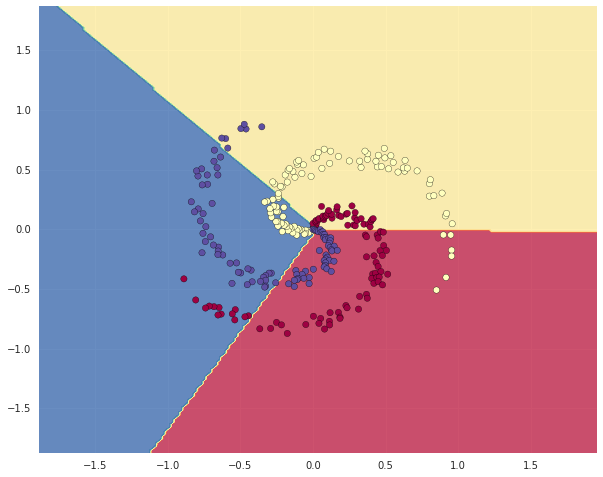

In [27]:
# Plot the decision boundary of our trained linear model on the dataset X
plot_decision_boundary(X, linear_model)

What can you deduce from this decision boundary? Does it help explain why the linear model makes bad predictions? 

## Using a nonlinear model

The linear model resulted in decision boundaries that were straight lines in 2D space. Using these straight lines, it is impossible to accurately separate our spiral-shaped data. Let's see how converting our model to be a non-linear function of its parameters could resolve this. 

### Defining helper functions
We will re-use the helper functions we defined earlier, but we also need a new helper **activation function** to introduce non-linearity into our model.

In [0]:
def relu(value):
  """ ReLU is the "Rectified Linear Unit activation function", defined as:
        relu(x) = x if x > 0, and 0 if x <= 0
  """
  return np.maximum(0, value)  

### Defining the Non-Linear model
We define this as a class with the same interface as the LinearModel. This way we can reuse exactly the same training and evaluation functions we defined earlier!

In [0]:
### HYPERPARAMETERS

learning_rate = 1e-0  # How far along the gradient do we want to travel when doing 
                      # gradient descent?
reg_lambda = 1e-3  # Regularization strength
num_hidden = 100  # Size of hidden layer.
####

non_linear_W_init = 0.01 * np.random.randn(dimensions, num_hidden)
non_linear_W2_init = 0.01 * np.random.randn(num_hidden, num_classes)


class NonLinearModel(object):
  def __init__(self):
    # Initialize the model parameters.
    self.W = non_linear_W_init
    self.b = np.zeros((1, num_hidden))
    self.W2 = non_linear_W2_init
    self.b2 = np.zeros((1, num_classes))

  def predictions(self, X):
    """Make predictions of classes (y values) given some inputs (X)."""
    # Evaluate class scores/"logits": [points_per_class*num_classes x num_classes].
    logits = self.get_logits(X)

    # Compute the class probabilities.
    probs = softmax(logits)
    
    return probs
  
  def loss(self, probs, y):
    """Calculate the loss given model predictions and true targets."""
    data_loss = cross_entropy(probs, y)
    regulariser = l2_loss([self.W, self.W2])
    return data_loss + regulariser
  
  def update(self, probs, X, y):  
    """Update the model parameters using back-propagation and gradient descent."""
    hidden_output = self.hidden_layer(X)
    
    # Calculate the gradient of the loss with respect to logits
    dlogits = self.derivative_loss_logits(probs, y)  
    
    # Backpropate the gradient to the parameters.
    
    # We first backprop into parameters W2 and b2.
    dW2 = self.derivative_loss_W2(hidden_output, dlogits)
    db2 = self.derivative_loss_b2(dlogits)

    # Next, backprop into the hidden layer.
    dhidden = self.derivative_hidden(hidden_output, dlogits)

    # Finally, backprop into W,b.
    dW = self.derivative_loss_W(X, dhidden)
    db = self.derivative_loss_b(dhidden)

    # Add regularization gradient contribution.
    dW2 += self.derivative_regularisation_W2()
    dW += self.derivative_regularisation_W()

    # Perform a parameter update (one step of gradient descent).
    self.W += -learning_rate * dW
    self.b += -learning_rate * db
    self.W2 += -learning_rate * dW2
    self.b2 += -learning_rate * db2
    

  ## DEFINE THE MODEL HELPER FUNCTIONS  
  
  def hidden_layer(self, X):
    """Calculate the output of the hidden layer."""
    return relu(np.dot(X, self.W) + self.b)
    
  def get_logits(self, X):
    """Calculate the logits from the input data X."""
    hidden_output = self.hidden_layer(X)
    logits = np.dot(hidden_output, self.W2) + self.b2
    return logits
  
  def derivative_loss_logits(self, logits, y):
    """Calculate the derivative of the loss with respect to logits."""
    num_examples = y.shape[0]
    dlogits = logits
    dlogits[range(num_examples),y] -= 1
    dlogits /= num_examples
    return dlogits
  
  def derivative_loss_W2(self, hidden_output, dlogits):
    """Calculate the derivative of the loss wrt W2."""
    dW2 = np.dot(hidden_output.T, dlogits)
    return dW2
  
  def derivative_loss_b2(self, dlogits):
    """Calculate the derivative of the loss wrt b2."""
    return np.sum(dlogits, axis=0, keepdims=True)
    
  def derivative_hidden(self, hidden_output, dlogits):
    """Calculate the derivative of the loss wrt the hidden layer."""
    # Calculate the gradient as if the hidden layer were a normal linear layer. 
    dhidden = np.dot(dlogits, self.W2.T)
    
    # Now take the Relu non-linearity into account
    dhidden[hidden_output <= 0] = 0
    
    return dhidden
    
  def derivative_loss_W(self, X, dhidden):
    """Calculate the derivative of the loss wrt W."""
    return np.dot(X.T, dhidden)
  
  def derivative_loss_b(self, dhidden):
    """Calculate the derivative of the loss wrt b."""
    return np.sum(dhidden, axis=0, keepdims=True)
  
  def derivative_regularisation_W(self):
    """Calculate the gradient of the L2 loss wrt W."""
    return reg_lambda * self.W 
  
  def derivative_regularisation_W2(self):
    """Calculate the gradient of the L2 loss wrt W2."""
    return reg_lambda * self.W2

### Train the Non Linear Model

In [30]:
# Create an instance of our non-linear model.
non_linear_model = NonLinearModel()

# Train the model for 10000 epochs
train_model(non_linear_model, 10000, 1000)

iteration 0: loss 1.098728
iteration 1000: loss 0.294024
iteration 2000: loss 0.257186
iteration 3000: loss 0.248922
iteration 4000: loss 0.246138
iteration 5000: loss 0.245244
iteration 6000: loss 0.244853
iteration 7000: loss 0.244698
iteration 8000: loss 0.244618
iteration 9000: loss 0.244265


In [34]:
# evaluate training set accuracy of the non-linear model
evaluate_model(non_linear_model)

Accuracy: 0.98


Much better! Is it possible to get to 100%? What factors about the dataset would influence this?

### Visualize the Nonlinear Model's Decision Boundary
Lets see what the decision boundary of the non-linear model looks like

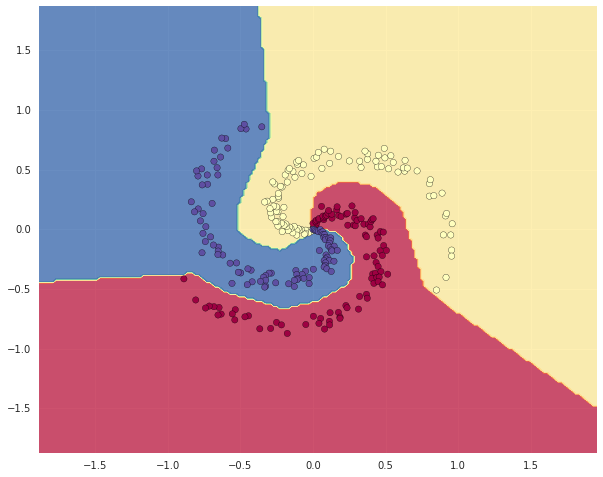

In [35]:
# Plot the decision boundary of the non-linear model on the dataset X
plot_decision_boundary(X, non_linear_model)

# Using TensorFlow

The above models worked well, but it was a little tedius to implement the gradients by hand. Let's re-implement the above models using TensorFlow and see how it compares.

### Define hyperparameters

In [0]:
# First we need to import TensorFlow.
import tensorflow as tf

tf.reset_default_graph()

### HYPERPARAMETERS
learning_rate = 1e-0
reg_lambda = 1e-3
training_iterations = 200  # 'epochs'
batch_size = X.shape[0]  # The whole dataset; i.e. batch gradient descent.
display_step = 10  # How often should we print our results
###

# Network Parameters
num_input = 2 # 2-dimensional input data
num_classes = 3 # red, yellow and blue!
# TODO(avishkar): Just re-use the values defined previously?

# placeholders for the inputs and labels. We will 'feed' these to the graph.
x_tf = tf.placeholder(tf.float32, [None, num_input])
y_tf = tf.placeholder(tf.int32, [None])

### Define helper functions
Lets create some helper functions that we can re-use in the Tensorflow models. We need fewer than before because Tensorflow already provides lots of useful functions out the box! 

In [0]:
def cross_entropy_tf(predictions, targets):
  """Calculate the cross entropy loss given some model predictions and target (true) values."""
  targets = tf.one_hot(targets, num_classes)
  return tf.reduce_mean(-tf.reduce_sum(targets * tf.log(predictions), axis=1))

## Linear Model

We construct a linear model with the same architecture as above. Notice how TensorFlow provides out-the-box many of the functions we had to previously define ourselves. There is another major difference between the TensorFlow code and Numpy code that may not be immediately apparant. In TensorFlow, when we call functions like tf.nn.softmax() we are not performing a computation, rather we are defining an operation in a calculation graph that gets run later. 

In [0]:
class TFLinearModel(object):
  def __init__(self):
    # Initialise the variables
    # Tensorflow variables can be updated automatically by optimisers.
    self.W = tf.Variable(W_init, dtype=tf.float32)
    self.b = tf.Variable(tf.zeros([num_classes]), dtype=tf.float32)

  def predictions(self, X):
    """Make predictions of classes (y values) given some inputs (X)."""
    logits = self.get_logits(X)

    # Compute the class probabilities.
    probs = tf.nn.softmax(logits)
    
    return probs
  
  def loss(self, probs, y):
    """Calculate the loss given model predictions and true targets."""
    data_loss = cross_entropy_tf(probs, y)
    regulariser = reg_lambda * tf.nn.l2_loss(self.W)
    return data_loss + regulariser
    
  def get_logits(self, X):
    return tf.add(tf.matmul(X, self.W), self.b)

**TODO(sgouws)**: Discuss that this op wraps computation of grandients (backprop) as well as updating of parameters (optimization).

Remember, up until now we've been defining a calculation graph. Now we can run this graph multiple times, feeding in our data, in a training loop. The training loop is a bit more complex than before, but by wrapping up our models in classes, we can again benefit from the re-using the same training loop on multiple models.

In [0]:
def train_tf_model(tf_model, epochs, report_every):
  
  # Get the op which, when executed, will initialize the variables.
  init = tf.global_variables_initializer()
  
  # Get the model probabilities
  probs = tf_model.predictions(x_tf)
  
  # Get the model loss
  loss = tf_model.loss(probs, y_tf)
  
  # Compute the gradient of the loss with respect to the model parameters 
  # and perform one parameter update in the direction of the gradients 
  # (take one 'step')
  optimizer_step = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

  with tf.Session() as sess:
    # Actually initialize the variables (run the op).
    sess.run(init)

    # Training cycle.
    for iteration in range(epochs):
        avg_cost = 0.
        total_batch = int(X.shape[0] / batch_size)

        # Loop over all batches.
        for i in range(total_batch):

            batch_x = X[i * batch_size : (i + 1) * batch_size, :]
            batch_y = y[i * batch_size : (i + 1) * batch_size]

            # Run optimization op (backprop) and cost op (to get loss value).
            _, c = sess.run([optimizer_step, loss], feed_dict={x_tf: batch_x,
                                                               y_tf: batch_y})
            # Compute average loss.
            avg_cost += c / total_batch

        # Display logs per iteration/epoch step.
        if iteration % report_every == 0:
            print "Iteration:", '%04d' % (iteration + 1), "cost=", \
                "{:.9f}".format(avg_cost)

    print "Optimization Finished!"
  


# Test model
# TODO: Hold out and calculate accuracy on actual held-out data
#correct_prediction = tf.equal(tf.argmax(probs, 1), y_tf)
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
#print "Accuracy:", accuracy.eval({x_tf: X, y_tf: y})


In [51]:
# Intialize our TensorFlow Linear Model
tf_linear_model = TFLinearModel()

# Train the model for 200 epochs
train_tf_model(tf_linear_model, 200, 10)


Iteration: 0001 cost= 1.100624442
Iteration: 0011 cost= 0.918447912
Iteration: 0021 cost= 0.851978481
Iteration: 0031 cost= 0.822559595
Iteration: 0041 cost= 0.807702661
Iteration: 0051 cost= 0.799514115
Iteration: 0061 cost= 0.794719875
Iteration: 0071 cost= 0.791787982
Iteration: 0081 cost= 0.789935768
Iteration: 0091 cost= 0.788736284
Iteration: 0101 cost= 0.787944198
Iteration: 0111 cost= 0.787413001
Iteration: 0121 cost= 0.787052453
Iteration: 0131 cost= 0.786805093
Iteration: 0141 cost= 0.786634088
Iteration: 0151 cost= 0.786515117
Iteration: 0161 cost= 0.786431789
Iteration: 0171 cost= 0.786373198
Iteration: 0181 cost= 0.786331892
Iteration: 0191 cost= 0.786302507
Optimization Finished!


**NOTE**: Our final cost (0.786) matches the final cost reached in our Numpy implementation above. This is not by accident, but because we used exactly the same initial values for the parameters, the same optimizer with the same update rules on the same data. (The exact value may be different if you changed some of the HyperParameters)

Notice how much less code we had to write for the TensorFlow model compared to the Numpy one earlier! TensorFlow is designed for deep learning and provides a number of common functions. In fact, it's possible to define a linear model like this in even fewer lines in TensorFlow, but we wanted to make this example as clear as possible!

### Visualizing the linear model's decision boundary

**TODO**: wrap the computation of logits above in a function, and pass this to plot_decision_boundary

In [33]:
def get_logits_linear_tf_wrapper(x):
  with tf.Session() as sess:
    return sess.run([logits], feed_dict={x_tf : x,
                                         y_tf : np.zeros(X.shape[0])})
  
plot_decision_boundary(X, get_logits_linear_tf_wrapper)

FailedPreconditionError: ignored

## Using a nonlinear classifier

Lets replicate the Non linear model in TensorFlow. TensorFlow saves us from writing even more code as the model becomes more complex. In particular, this is because we don't have to implement the derivatives ourselves!

In [0]:
class TFNonLinearModel(object):
  def __init__(self):
    # Initialise the variables
    # Tensorflow variables can be updated automatically by optimisers.
    self.W = tf.Variable(non_linear_W_init, dtype=tf.float32)
    self.b = tf.Variable(tf.zeros([num_hidden]), dtype=tf.float32)
    self.W2 = tf.Variable(non_linear_W2_init, dtype=tf.float32)
    self.b2 = tf.Variable(tf.zeros([num_classes]), dtype=tf.float32)

  def predictions(self, X):
    """Make predictions of classes (y values) given some inputs (X)."""
    logits = self.get_logits(X)

    # Compute the class probabilities.
    probs = tf.nn.softmax(logits)
    
    return probs
  
  def loss(self, probs, y):
    """Calculate the loss given model predictions and true targets."""
    data_loss = cross_entropy_tf(probs, y)
    regulariser = reg_lambda * tf.nn.l2_loss(self.W) + reg_lambda * tf.nn.l2_loss(self.W2)
    return data_loss + regulariser
    
  def get_logits(self, X):
    hidden_output = self.hidden_layer(X)
    logits = tf.add(tf.matmul(hidden_output, self.W2), self.b2)
    return logits
  
  def hidden_layer(self, X):
    linear = tf.add(tf.matmul(X, self.W), self.b)
    return tf.nn.relu(linear)

In [53]:
# Create an instance of the TensorFlow Non Linear model
tf_non_linear_model = TFNonLinearModel()

# Train it for 10000 epochs
train_tf_model(tf_non_linear_model, 10000, 1000)

Iteration: 0001 cost= 3.389464140
Iteration: 1001 cost= 0.244196594
Iteration: 2001 cost= 0.244092196
Iteration: 3001 cost= 0.244063124
Iteration: 4001 cost= 0.244036168
Iteration: 5001 cost= 0.244037494
Iteration: 6001 cost= 0.244020045
Iteration: 7001 cost= 0.244022638
Iteration: 8001 cost= 0.244015068
Iteration: 9001 cost= 0.244016916
Optimization Finished!


## Visualizing the Nonlinear Model's Decision Boundary

**TODO**

# Resources

* http://cs.stanford.edu/people/karpathy/cs231nfiles/minimal_net.html 
* https://aqibsaeed.github.io/2016-07-07-TensorflowLR/

